In this lesson, we will use the conservation laws to develop the ability to resolve areas of shock within descretization. These regions are regions of very high gradient.

Conservation of Mass:

In any closed system, we know that mass M in the system does not change. 

Using the idea of a control volume, mass can move in and out of the volume. The rate of change of mass in the control volume plus the rate of flow of mass across control surfaces must equal 0.

We are now going to look at a different type of problem that is similar to the homework 2 that was completed for the previous module

In [2]:
import numpy as ny
from matplotlib import pyplot as py
%matplotlib inline

py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [3]:
def rho_green_light(x, rho_light):
    
    # this function creates the initial
    # green light condition. It consists of a shock
    # with a linear distribution behind it.
    
    rho = ny.zeros_like(x)
    mask = ny.where(x < 2.0)
    rho[mask]  = rho_light * x[mask] / 2.0
    return rho


In [4]:
#now we'll set our parameters of the road

nx = 81 # number of locations on the road
L = 4.0 # length of the road
dx = L / (nx - 1) # distance between road points
nt = 30 # number of time steps
u_max =1.0 # maximum speed allowed on road
rho_max = 10.0 # maximum car density allowed on road
rho_light = 10.0 # car density at the stoplight

# create x throughout the road
x = ny.linspace(0.0, L, num=nx)

#compute initial traffic density
rho0 = rho_green_light(x, rho_light)

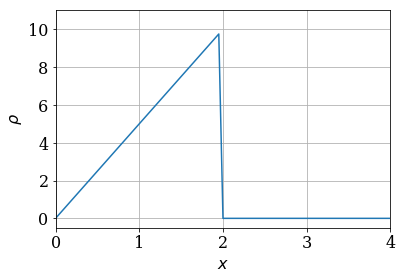

In [6]:
#plot initial car density on road

py.figure(figsize = (6.0, 4.0))
py.xlabel(r'$x$')
py.ylabel(r'$\rho$')
py.grid()
py.plot(x, rho0)
py.xlim(0.0, L)
py.ylim(-0.5, 11.0);

Now, we have to figure out what happens when the light turns green. This is when we must apply time discritization.

In [7]:
# now we have to create a function that defines the
# traffic flux.

def flux(rho, u_max, rho_max):
    
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [8]:
# we will start by using the forward time/barward space
# model using a for loop

def forward_backward(rho0, nt, dt, dx, bc_value, *args):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # find traffic flux
        F = flux(rho, *args)
        # advance in time
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # set left boundary solution
        rho[0] = bc_value
        # save the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [9]:
# set time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max #time-step size

# compute the traffic density at all steps
rho_hist = forward_backward(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [16]:
from matplotlib import animation
from IPython.display import HTML

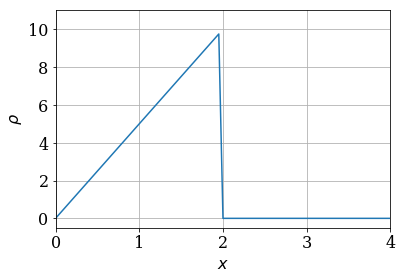

In [27]:

fig = py.figure(figsize = (6.0, 4.0))
py.xlabel(r'$x$')
py.ylabel(r'$\rho$')
py.grid()
line = py.plot(x, rho0)[0]
py.xlim(0.0, L)
py.ylim(-0.5, 11.0);

In [28]:
# create a function that updates the plot for each
# time-step

def update_plot(n, rho_hist):
    
    fig.suptitle('Time step [:0>2]'.format(n))
    line.set_ydata(rho_hist[n])

In [29]:
#create animation of the traffic density
anim = animation.FuncAnimation(fig, update_plot, 
                       frames=nt, fargs=(rho_hist,),
                       interval = 100.0)

#display video
HTML(anim.to_html5_video())

Now, in order to avoid the blow up, we must first 
make sure that our rho is below half of the maximum density. This is because for this specific problem, the sign of the velocity of the wave changes when this occurs. 



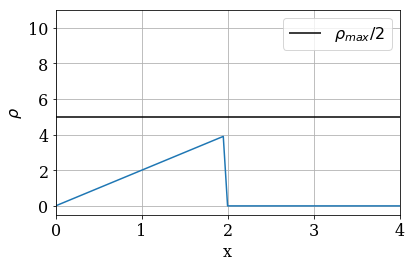

In [40]:
# modify parameters to meet needs
nt = 40 # new numbers of time steps
rho_light = 4.0 # car density at stoplight

#initial traffic density
rho0 = rho_green_light(x, rho_light)

# plot initial traffic density

fig = py.figure(figsize=(6.0, 4.0))
py.xlabel('x')
py.ylabel(r'$\rho$')
py.grid()
line = py.plot(x, rho0,)[0]
py.hlines(rho_max /2.0, 0.0, L, label=r'$\rho_{max} / 2$')
py.legend()
py.xlim(0.0, L)
py.ylim(-0.5, 11.0)
fig.tight_layout()

In [41]:
# compute traffic density at all steps
rho_hist = forward_backward(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [42]:
# create animation
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)

# display the animation
HTML(anim.to_html5_video())

now we will look at how the CFL number affects the the stability of the solution.

In [43]:
#set paramters
rho_light = 4.0
u_max = 1.1

# compute the initial traffic density
rho0 = rho_green_light(x, rho_light)

# compute the traffic density at all time steps
rho_hist = forward_backward(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

#create animation
anim = animation.FuncAnimation(fig, update_plot,
                              frames=nt, fargs=(rho_hist,),
                              interval=100)

#video
HTML(anim.to_html5_video())